In [138]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
sns.set()

%matplotlib inline

In [30]:
df = pd.read_csv('train.csv')
df.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


In [31]:
df_1 = pd.read_csv('unique_m.csv')
df_1.head()

,H,He,Li,Be,B,C,N,O,F,Ne,...,Au,Hg,Tl,Pb,Bi,Po,At,Rn,critical_temp,material
0,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,29.0,Ba0.2La1.8Cu1O4
1,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,26.0,Ba0.1La1.9Ag0.1Cu0.9O4
2,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,19.0,Ba0.1La1.9Cu1O4
3,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,22.0,Ba0.15La1.85Cu1O4
4,0.0,0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,23.0,Ba0.3La1.7Cu1O4


In [86]:
X = df.drop('critical_temp', axis=1)
y = df['critical_temp']

In [120]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, StratifiedKFold, train_test_split, GridSearchCV,KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge,Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl

In [92]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [93]:
mean=X_train.mean(axis=0)
std=X_train.std(axis=0)
X_train=(X_train-mean)/std

In [94]:
# Ridge

In [132]:
clf = Ridge()
cv=KFold(shuffle=True,n_splits=5).split(X_train,y_train)
grid=GridSearchCV(clf,param_grid={'alpha':[0.01,0.05,0.1,0.5,1,5,10],},scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)
#print(np.sqrt(mean_squared_error(y_test, clf.predict((X_test-mean)/std))))
#print (clf.score((X_test-mean)/std,y_test))

0.7287821107471295
{'alpha': 0.1}


In [133]:
clf=Ridge(**grid.best_params_)
clf.fit(X_train,y_train)
print(mean_squared_error(y_test,clf.predict((X_test-mean)/std))**0.5)
print(r2_score(y_test,clf.predict((X_test-mean)/std)))

17.290946086461908
0.7455514211925509


In [134]:
args=np.argsort(clf.coef_)
feature_imp=[x for x in zip(X_train.columns[args],clf.coef_[args])]
feature_imp[::-1]

[('wtd_mean_atomic_radius', 82.74684323895688),
 ('std_ElectronAffinity', 28.17767260224111),
 ('entropy_atomic_radius', 27.99000678775259),
 ('entropy_Valence', 27.856428289489706),
 ('wtd_mean_ThermalConductivity', 22.458024650294544),
 ('mean_atomic_mass', 21.809768375371185),
 ('wtd_mean_Valence', 20.42015952825072),
 ('range_fie', 20.17644653833073),
 ('wtd_gmean_atomic_mass', 19.642380195288037),
 ('wtd_gmean_fie', 18.952364909425295),
 ('wtd_mean_ElectronAffinity', 18.796967312915914),
 ('gmean_Valence', 17.34374463243914),
 ('wtd_gmean_FusionHeat', 16.93443693877146),
 ('wtd_entropy_atomic_radius', 16.702319341771567),
 ('mean_FusionHeat', 16.531074513284274),
 ('wtd_entropy_fie', 15.910861221187693),
 ('std_ThermalConductivity', 15.873013641672477),
 ('range_atomic_radius', 13.358373049620015),
 ('mean_fie', 12.892015721862304),
 ('range_atomic_mass', 11.676535643483357),
 ('wtd_gmean_Density', 10.75389716924585),
 ('std_Density', 9.784379733083748),
 ('wtd_entropy_FusionHeat'

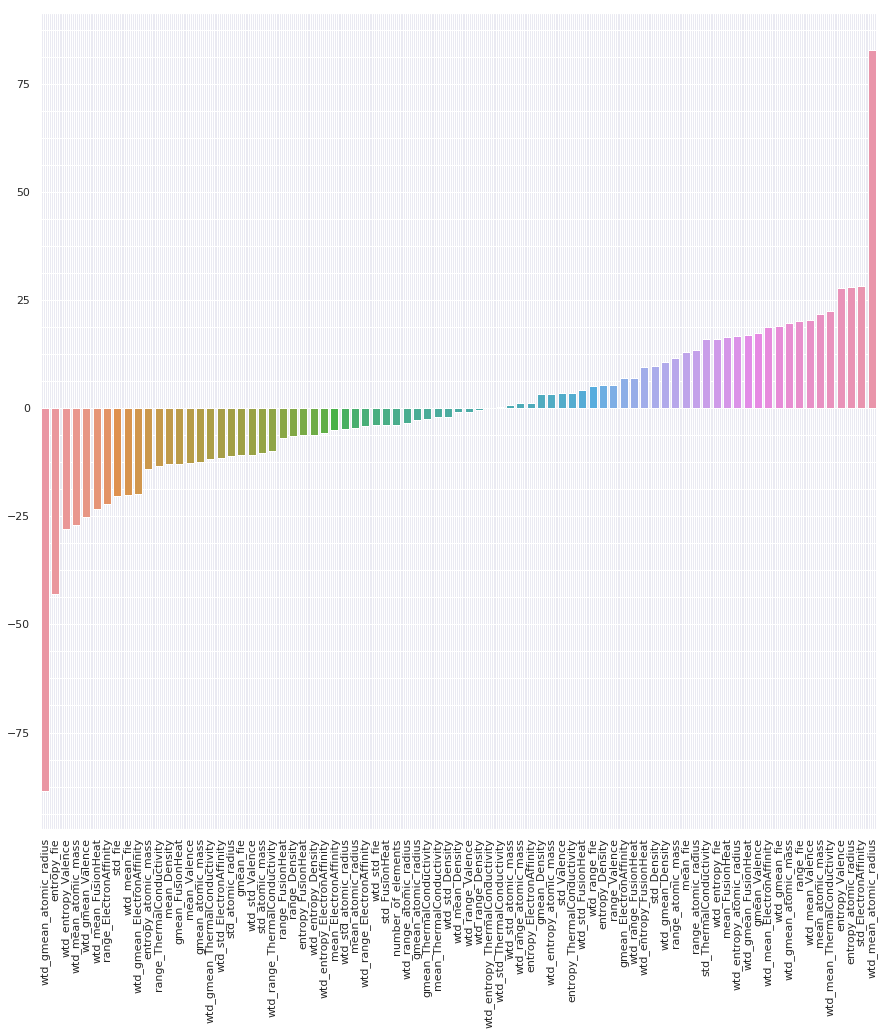

In [135]:

plt.figure(figsize=(15,15))

fig=sns.barplot(x=[x[0] for x in feature_imp],y=[x[1] for x in feature_imp])
fig.set_xticklabels([x[0] for x in feature_imp],rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [136]:
# Lasso

In [139]:
clf = Lasso()
cv=KFold(shuffle=True,n_splits=5).split(X_train,y_train)
grid=GridSearchCV(clf,param_grid={'alpha':[0.01,0.05,0.1,0.5,1,5,10],},scoring='r2',cv=cv,)
grid.fit(X_train,y_train)
print (grid.best_score_)
print (grid.best_params_)
#print(np.sqrt(mean_squared_error(y_test, clf.predict((X_test-mean)/std))))
#print (clf.score((X_test-mean)/std,y_test))

0.7262364622644412
{'alpha': 0.01}


In [140]:
clf=Lasso(**grid.best_params_)
clf.fit(X_train,y_train)
print(mean_squared_error(y_test,clf.predict((X_test-mean)/std))**0.5)
print(r2_score(y_test,clf.predict((X_test-mean)/std)))

17.445419189173055
0.7409847498302002


In [141]:
args=np.argsort(clf.coef_)
feature_imp=[x for x in zip(X_train.columns[args],clf.coef_[args])]
feature_imp[::-1]

[('std_ElectronAffinity', 26.998686816991817),
 ('range_fie', 19.874755500851556),
 ('wtd_mean_ThermalConductivity', 19.793187905512028),
 ('mean_atomic_radius', 19.345709832434814),
 ('wtd_mean_ElectronAffinity', 17.74181371817873),
 ('wtd_mean_atomic_radius', 15.666464757810905),
 ('entropy_fie', 14.826347582550971),
 ('range_atomic_radius', 14.283738389344718),
 ('wtd_entropy_fie', 13.10233885098803),
 ('wtd_std_atomic_radius', 10.594208121163406),
 ('wtd_gmean_Density', 10.5052792685323),
 ('range_atomic_mass', 10.259092568310564),
 ('wtd_entropy_FusionHeat', 8.586371699150206),
 ('mean_atomic_mass', 8.330162166560166),
 ('std_ThermalConductivity', 8.304192974535402),
 ('wtd_entropy_atomic_radius', 7.38959594129333),
 ('std_Density', 6.261062367967242),
 ('wtd_entropy_atomic_mass', 6.1745858778688225),
 ('gmean_ElectronAffinity', 5.791966965311566),
 ('wtd_range_FusionHeat', 5.011993324967791),
 ('wtd_range_fie', 4.749215777491513),
 ('gmean_Valence', 4.093844994101726),
 ('range_V

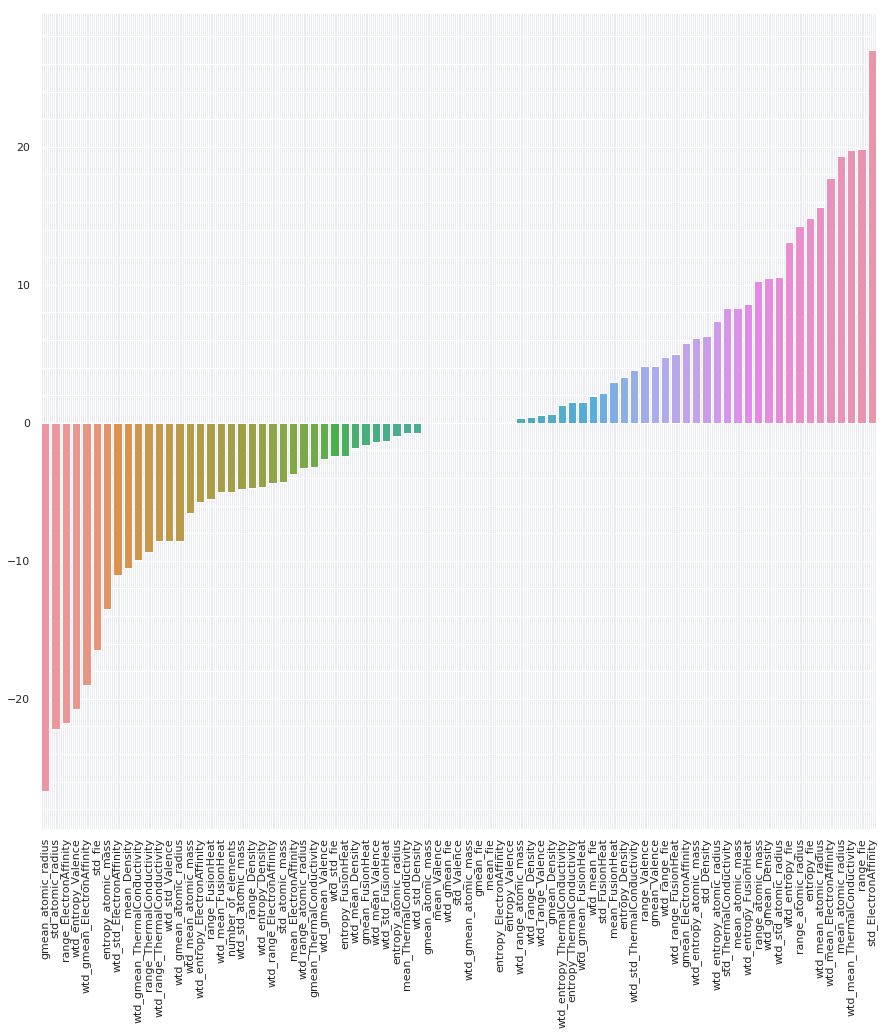

In [142]:

plt.figure(figsize=(15,15))

fig=sns.barplot(x=[x[0] for x in feature_imp],y=[x[1] for x in feature_imp])
fig.set_xticklabels([x[0] for x in feature_imp],rotation=90);
fig.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
fig.grid(b=True, which='major', color='w', linewidth=1.0)
fig.grid(b=True, which='minor', color='w', linewidth=1.0)

In [10]:
clf = XGBRegressor(max_depth=16, learning_rate=0.02, n_estimators=380, colsample_bytree=0.5)
clf.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=16, min_child_weight=1, missing=None, n_estimators=380,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [11]:
print(np.sqrt(mean_squared_error(y_test, clf.predict(X_test))))

9.534464956281703
